# Question B 

Download two attached datasets (Fake.csv and True.csv), which contains real and fake news. In the given
dataset, there is a total of five columns. Now build a Bi-LSTM model to detect fake mews using TensorFlow
and other available libraries. Some hints are as follows:

## Import Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

true = pd.read_csv("True.csv")
fake = pd.read_csv("Fake.csv")
true.head() #there is a lot of unneeded info - such as subject & date

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [3]:
#keep only the title and text columns 
true_1 = true[["title", "text"]]
fake_1 = fake[["title", "text"]]
fake_1.head() 

,title,text
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk..."
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ..."
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...


In [4]:
# Assign labels based on the truth/fakeness of the text
true_1['class'] = 1 #assign real news a label of 1
fake_1["class"] = 0 #assign fake news a label of 0 

#Weirdly getting an errorbut the code is running. I did this the exact same way...

<ipython-input-4-34f9331c9580>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  true_1['class'] = 1 #assign real news a label of 1
<ipython-input-4-34f9331c9580>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake_1["class"] = 0 #assign fake news a label of 0


In [5]:
# Concatenate both dataframes into 1 
frames= [true_1, fake_1]
df = pd.concat(frames)

# make the title & text a single column 
df["article"] = df["title"] + " "+ df["text"]
df.drop(["title", "text"], axis=1)

,class,article
0,1,"As U.S. budget fight looms, Republicans flip t..."
1,1,U.S. military to accept transgender recruits o...
2,1,Senior U.S. Republican senator: 'Let Mr. Muell...
3,1,FBI Russia probe helped by Australian diplomat...
4,1,Trump wants Postal Service to charge 'much mor...
...,...,...
23476,0,McPain: John McCain Furious That Iran Treated ...
23477,0,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...
23478,0,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...
23479,0,How to Blow $700 Million: Al Jazeera America F...


## Remove Stopwords in Dataset

Stopwords are unnecessary text like "the", "in", "to" and "of" that take away from the gist of a text. 

In [6]:
import nltk.corpus
from nltk.corpus import stopwords

stop_words = stopwords.words("english")
df["article_wo_stopwords"] = df["article"].apply(lambda x: " ".join([word for word in x.split() if word not in (stop_words)]))
df[["article", "article_wo_stopwords"]].head(5)

,article,article_wo_stopwords
0,"As U.S. budget fight looms, Republicans flip t...","As U.S. budget fight looms, Republicans flip f..."
1,U.S. military to accept transgender recruits o...,U.S. military accept transgender recruits Mond...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,Senior U.S. Republican senator: 'Let Mr. Muell...
3,FBI Russia probe helped by Australian diplomat...,FBI Russia probe helped Australian diplomat ti...
4,Trump wants Postal Service to charge 'much mor...,Trump wants Postal Service charge 'much more' ...


## Remove Words with 2 or fewer Characters 

For a better model, remove stopwords and remove words with 2 or fewer characters, after that split data into test and train set. 

In [7]:
df["article_wo_smallword"] = df["article_wo_stopwords"].apply(lambda x: " ".join([word for word in x.split() if len(word) > 2]))
df[["article", "article_wo_stopwords", "article_wo_smallword"]].head(-5)
df

,title,text,class,article,article_wo_stopwords,article_wo_smallword
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,1,"As U.S. budget fight looms, Republicans flip t...","As U.S. budget fight looms, Republicans flip f...","U.S. budget fight looms, Republicans flip fisc..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,1,U.S. military to accept transgender recruits o...,U.S. military accept transgender recruits Mond...,U.S. military accept transgender recruits Mond...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,1,Senior U.S. Republican senator: 'Let Mr. Muell...,Senior U.S. Republican senator: 'Let Mr. Muell...,Senior U.S. Republican senator: 'Let Mr. Muell...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,1,FBI Russia probe helped by Australian diplomat...,FBI Russia probe helped Australian diplomat ti...,FBI Russia probe helped Australian diplomat ti...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,1,Trump wants Postal Service to charge 'much mor...,Trump wants Postal Service charge 'much more' ...,Trump wants Postal Service charge 'much more' ...
...,...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,0,McPain: John McCain Furious That Iran Treated ...,McPain: John McCain Furious That Iran Treated ...,McPain: John McCain Furious That Iran Treated ...
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,0,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,0,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Sunnistan: US Allied ‘Safe Zone’ Plan Take Ter...,Sunnistan: Allied ‘Safe Zone’ Plan Take Territ...
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,0,How to Blow $700 Million: Al Jazeera America F...,How Blow $700 Million: Al Jazeera America Fina...,How Blow $700 Million: Jazeera America Finally...


In [8]:
import re
def preprocessing(text):
    text = re.sub("<[^>]*>", "", text)
    text = re.sub(r"[^\w\s]", "", text)
    text=text.lower()
    return text 

df["clean_articles"] = df["article_wo_smallword"].apply(preprocessing)
df["clean_articles"] #check if changes have been applied 

0        us budget fight looms republicans flip fiscal ...
1        us military accept transgender recruits monday...
2        senior us republican senator let mr mueller jo...
3        fbi russia probe helped australian diplomat ti...
4        trump wants postal service charge much more am...
                               ...                        
23476    mcpain john mccain furious that iran treated s...
23477    justice yahoo settles email privacy classactio...
23478    sunnistan allied safe zone plan take territori...
23479    how blow 700 million jazeera america finally c...
23480    us navy sailors held iranian military signs ne...
Name: clean_articles, Length: 44898, dtype: object

### Split into Test and Train Set 

In [9]:
from sklearn.model_selection import train_test_split

X = df["clean_articles"]
y = df["class"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1)

## Tokenization

You might also need to create a tokenizer to tokenize the words and create sequences of tokenized words.

#### Parameters

In [10]:
most_common_size = 10000 #take most common 10,000 words 
max_len = 256 #256 characters per sequence 
unrecognized_words = "OOV" #where OOV stands for "out of vocabulary", used for words that aren't in word index 
padding = "post" #pad article length to 256 (adding 56 zeros)
truncation = "post"

In [11]:
#Set the tokenizer 
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words = most_common_size, oov_token = unrecognized_words) #specify 10,000 most frequent words 
tokenizer.fit_on_texts(X_train) #method that goes through text, creating dictionary 

In [12]:
X_train = tokenizer.texts_to_sequences(X_train) #converts tokens of text corpus to sequence of integers (which is the index of a token in a dictionary)
X_test = tokenizer.texts_to_sequences(X_test)

In [13]:
X_train= tf.keras.preprocessing.sequence.pad_sequences(X_train, padding = padding, truncating = truncation, maxlen = max_len)
X_test= tf.keras.preprocessing.sequence.pad_sequences(X_test, padding = padding, truncating = truncation, maxlen = max_len)

## Building Out the Model 

You can call Bi-Directional LSTM from Keras and where fitting set Sigmoid and ReLU as activation function, adam as the optimizer, and binary cross-entropy loss function should be used. 

In [14]:
model_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(most_common_size, 64), 
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences = True)),
    tf.keras.layers.Dropout(0.5), 
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)), 
    tf.keras.layers.Dropout(0.5), 
    tf.keras.layers.Dense(1, activation='sigmoid'),
    tf.keras.layers.Dense(64, activation="relu"), 
    tf.keras.layers.Dense(1)
])

#I read that you need a dropout layer after each bidirection layer

# We probably need to comment on what each layer in the lstm model is doing here. 

model_lstm.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          640000    
                                                                 
 bidirectional (Bidirectiona  (None, None, 128)        66048     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, None, 128)         0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 32)               18560     
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 3

In [ ]:
#example from medium

def build_bilstm(word_index, embeddings_dict, nclasses,  MAX_SEQUENCE_LENGTH=500, EMBEDDING_DIM=50, dropout=0.5, hidden_layer = 3, lstm_node = 32):
    # Initialize a sequebtial model
    model = Sequential()
    # Make the embedding matrix using the embedding_dict
    embedding_matrix = np.random.random((len(word_index) + 1, EMBEDDING_DIM))
    for word, i in word_index.items():
        embedding_vector = embeddings_dict.get(word)
        if embedding_vector is not None:
            # words not found in embedding index will be all-zeros.
            if len(embedding_matrix[i]) != len(embedding_vector):
                print("could not broadcast input array from shape", str(len(embedding_matrix[i])),
                      "into shape", str(len(embedding_vector)), " Please make sure your"
                                                                " EMBEDDING_DIM is equal to embedding_vector file ,GloVe,")
                exit(1)
            embedding_matrix[i] = embedding_vector
            
    # Add embedding layer
    model.add(Embedding(len(word_index) + 1,
                                EMBEDDING_DIM,
                                weights=[embedding_matrix],
                                input_length=MAX_SEQUENCE_LENGTH,
                                trainable=True))
    # Add hidden layers 
    for i in range(0,hidden_layer):
        # Add a bidirectional lstm layer
        model.add(Bidirectional(LSTM(lstm_node, return_sequences=True, recurrent_dropout=0.2)))
        # Add a dropout layer after each lstm layer
        model.add(Dropout(dropout))
    model.add(Bidirectional(LSTM(lstm_node, recurrent_dropout=0.2)))
    model.add(Dropout(dropout))
    # Add the fully connected layer with 256 nurons and relu activation
    model.add(Dense(256, activation='relu'))
    # Add the output layer with softmax activation since we have 2 classes
    model.add(Dense(nclasses, activation='softmax'))
    # Compile the model using sparse_categorical_crossentropy
    model.compile(loss='sparse_categorical_crossentropy',
                      optimizer='adam',
                      metrics=['accuracy'])
    return model

# Bidirectional LSTMs in Keras
Bidirectional LSTMs are supported in Keras via the Bidirectional layer wrapper.

This wrapper takes a recurrent layer (e.g. the first LSTM layer) as an argument.

It also allows you to specify the merge mode, that is how the forward and backward outputs should be combined before being passed on to the next layer. The options are:

‘sum‘: The outputs are added together.
‘mul‘: The outputs are multiplied together.
‘concat‘: The outputs are concatenated together (the default), providing double the number of outputs to the next layer.
‘ave‘: The average of the outputs is taken.
The default mode is to concatenate, and this is the method often used in studies of bidirectional LSTMs.

https://analyticsindiamag.com/complete-guide-to-bidirectional-lstm-with-python-codes/


In [15]:
model_lstm.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), 
             optimizer=tf.keras.optimizers.Adam(1e-2), 
             metrics=["accuracy"])

## Batch Size & Epochs

During training set the batch size to 64 and the number of epochs to 2

In [16]:
early_stop =tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience = 2, restore_best_weights=True)

trained_model = model_lstm.fit(X_train, y_train, epochs = 2, validation_split= 0.1, batch_size = 64, callbacks=[early_stop])

Epoch 1/2
506/506 [==============================] - 184s 342ms/step - loss: 0.1920 - accuracy: 0.9383 - val_loss: 0.0377 - val_accuracy: 0.9975
Epoch 2/2
506/506 [==============================] - 181s 358ms/step - loss: 0.0365 - accuracy: 0.9941 - val_loss: 0.0227 - val_accuracy: 0.9975


In [18]:
model_lstm

In [27]:
print(trained_model.history)

{'loss': [0.19202618300914764, 0.03651466965675354], 'accuracy': [0.9383159279823303, 0.9940605163574219], 'val_loss': [0.03773592412471771, 0.022658327594399452], 'val_accuracy': [0.9974944591522217, 0.9974944591522217]}


In [20]:
#something is weird here
def plot_graphs(history, title):
  plt.plot(history.history[title])
  plt.plot(history.history['val_'+title], '')
  plt.xlabel("Epochs")
  plt.ylabel(title)
  plt.legend([title, 'val_'+title])
  plt.show()

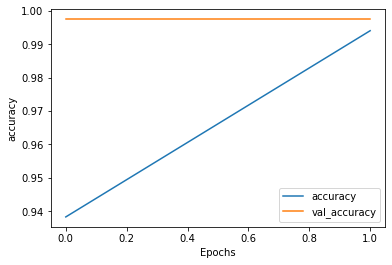

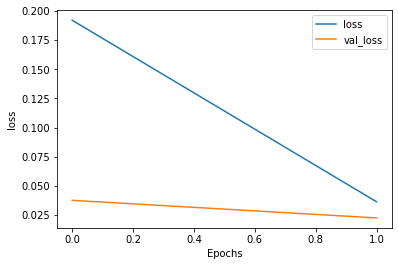

In [21]:
plot_graphs(trained_model, 'accuracy')
plot_graphs(trained_model, 'loss')

#why is this code only showing 1 epoch when I trained two!

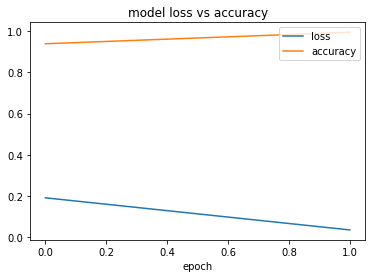

In [22]:
 from matplotlib import pyplot
 
pyplot.plot(trained_model.history['loss'])
pyplot.plot(trained_model.history['accuracy'])
pyplot.title('model loss vs accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['loss', 'accuracy'], loc='upper right')
pyplot.show()

In [23]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import matthews_corrcoef, confusion_matrix, classification_report

In [25]:
predicted = np.argmax(model_lstm.predict(X_test), axis=-1)
#predict has two different methods depending onif sigmoid or softmax is used last. 
print(classification_report(y_test, predicted))

#these results are bad. We should reorganize our layers.

              precision    recall  f1-score   support

           0       0.52      1.00      0.69      4678
           1       0.00      0.00      0.00      4302

    accuracy                           0.52      8980
   macro avg       0.26      0.50      0.34      8980
weighted avg       0.27      0.52      0.36      8980



C:\Users\danie\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\danie\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\danie\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [66]:
prediction = model_lstm.predict(X_test)
print(prediction)

[[ 5.5443654]
 [-5.681167 ]
 [ 5.5467362]
 ...
 [-5.6809516]
 [-5.6821914]
 [-5.682628 ]]


In [69]:
results = model_lstm.evaluate(X_test, y_test, batch_size=128)
print("test loss, test accuracy:", results)

71/71 [==============================] - 12s 170ms/step - loss: 0.0161 - accuracy: 0.9974
test loss, test acc: [0.01614772528409958, 0.9974387288093567]
Generate a prediction
prediction shape: (1, 1)
